In [2]:
import networkx as nx
import json as json

In [3]:
with open("Data/MMS_rv.json", 'r') as f:
    Data =  json.load(f)

In [9]:
DATA = {}
for item in Data:
    DATA.update({item['ID']:{"title": item["title"], "childs": item["childs"], "code": item["code"]}})

In [11]:
DATA['1121431779']

{'title': 'Heart valve diseases',
 'childs': ['1997348476',
  '1609206873',
  '1843615838',
  '1146446025',
  '1942372791',
  '1363514322',
  '1121431779/unspecified'],
 'code': ''}

In [3]:
type(Data)

list

In [4]:
Data[0]

{'ID': '1192168487',
 'code': 'QC68',
 'title': 'Family history of consanguinity',
 'defn': 'NA',
 'childs': [],
 'parents': ['1143554706'],
 'index': [{'indexTerm_title': 'Family history of consanguinity',
   'indexTerm_foundation_id': 'NA'}],
 'pcs': [],
 'is_leaf_node': True,
 'has_children': 0,
 'has_parents': 1}

In [5]:
for doc in Data:
    if(doc['ID'] == "other"):
        del(doc)
    elif("other" in doc['ID'] or "unspecified" in doc['ID']):
        pos = doc['ID'].find("/")
        doc['ID'] = doc['ID'][:pos]
    else:
        continue

In [6]:
cardio_list = list()

In [7]:
def extract_cardio(cardio):
    for doc in Data:
        if(doc['ID'] == cardio):
            cardio_list.append(doc)
            l = len(doc['childs'])
            if(l > 0):
                for i in range(l):
                    extract_cardio(doc['childs'][i])

In [8]:
for doc in Data:
    if(doc['ID'] == "426429380"):
        l = len(doc['childs'])
        if(l > 0):
            cardio_list.append(doc)
            for i in range(l):
                extract_cardio(doc['childs'][i])

In [9]:
print(cardio_list[0])

{'ID': '426429380', 'code': '11', 'title': 'Diseases of the circulatory system', 'defn': 'This refers to diseases of the organ system that passes nutrients (such as amino acids, electrolytes and lymph), gases, hormones, blood cells, etc. to and from cells in the body to help fight diseases, stabilize body temperature and pH, and to maintain homeostasis.', 'childs': ['539975693', '966120194', '924915526', '1663360295', '1964269418', '1059873720', '1703442464', '1296696944', '162683166', '1121431779', '291726710', '2135151223', '1457291912', '1458683894', '1164983645', '723430526', '1025888387', '1651137927', '1925333068', '426429380/other', '426429380/unspecified'], 'parents': ['mms'], 'index': [{'indexTerm_title': 'Other specified lower limb atherosclerosis', 'indexTerm_foundation_id': 'NA'}, {'indexTerm_title': 'Atherosclerosis of common or profunda femoral artery', 'indexTerm_foundation_id': '205736095'}, {'indexTerm_title': 'Atherosclerosis of superficial femoral artery', 'indexTerm

In [10]:
import networkx as nx

In [11]:
G = nx.Graph()
for doc in cardio_list:
    G.add_node(doc['ID'],\
               title = doc['title'],\
               code = doc['code'],\
               defn = doc['defn'],\
               childs = doc['childs'],\
               parents = doc['parents'])
    
for doc in cardio_list:
    childs = doc['childs']
    doc_id = doc['ID']
    for c_id in childs:
        G.add_edge(doc_id, c_id)

In [12]:
ROOT = [n for n in G.neighbors("426429380")]
INFO = []
for node in ROOT:
        try:
            INFO.append({"ID": node,\
                     "title": G.nodes()[node]["title"],\
                     "defn":  G.nodes()[node]['defn'],\
                     "child": len([n for n in G.neighbors(node)])})
        except:

             INFO.append({"ID": node,\
                     "title": "NA",\
                     "defn":"NA",\
                     "child": "NA"})

In [13]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 596\nNumber of edges: 595\nAverage degree:   1.9966'

In [14]:
id_list = list()
for doc in cardio_list:
    id_list.append(doc['ID'])

In [15]:
id_list[0:5]

['426429380', '539975693', '966120194', '924915526', '761947693']

In [16]:
nx.shortest_path(G, "426429380", id_list[1])

['426429380', '539975693']

In [17]:
paths = []
for id in id_list:
    paths.append({"Path" : nx.shortest_path(G, "426429380", id)})

In [18]:
len(paths)

408

In [19]:
paths[0:5]

[{'Path': ['426429380']},
 {'Path': ['426429380', '539975693']},
 {'Path': ['426429380', '966120194']},
 {'Path': ['426429380', '924915526']},
 {'Path': ['426429380', '924915526', '761947693']}]

In [20]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
plt.figure(figsize = [8,8])
pos = nx.spring_layout(G)
nx.draw(G,pos, 
        with_labels=False, 
        font_weight='bold',
        font_size = 20,
        node_size=1,
        node_color='blue',
        alpha = 0.5)
plt.show()

<Figure size 800x800 with 1 Axes>

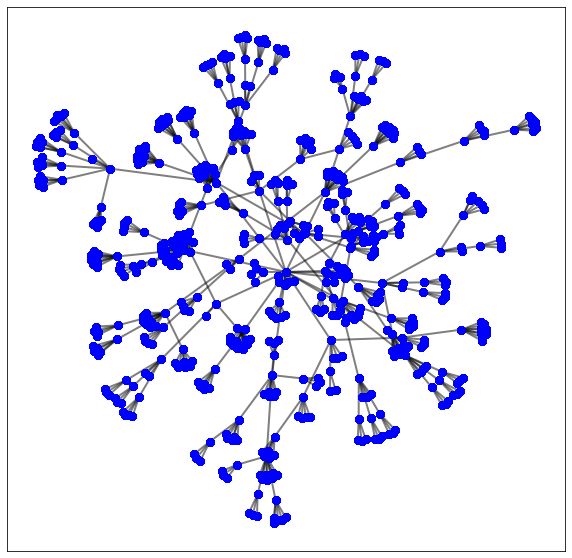

In [21]:
plt.figure(figsize = [10,10])

pos = nx.spring_layout(G)  # positions for all nodes


for node in G.nodes():
    nx.draw_networkx_nodes(G,pos,
                       node_color='blue',
                       node_size=50,
                       alpha=0.4)
for edge in G.edges():
    nx.draw_networkx_edges(G,pos,
                       edgelist=[edge],
                       width=2, alpha=0.5, edge_color='black')
plt.show()

In [22]:
import pandas as pd

In [23]:
icd_dist = pd.DataFrame(columns = ['ICD11_Code', 'Number_of_Children'])
for doc in paths[1:]:
    icd_dist = icd_dist.append({'ICD11_Code': doc['Path'][1], 'Number_of_Children': (len(doc['Path']) - 1)}, ignore_index = True)

In [24]:
icd_dist.head(10)

,ICD11_Code,Number_of_Children
0,539975693,1
1,966120194,1
2,924915526,1
3,924915526,2
4,924915526,3
5,924915526,3
6,924915526,3
7,924915526,2
8,924915526,2
9,924915526,2


In [25]:
g1 = icd_dist.groupby(['ICD11_Code']).count()
g1

,Number_of_Children
ICD11_Code,
1025888387,21
1059873720,15
1121431779,46
1164983645,71
1296696944,10
1457291912,62
1458683894,9
162683166,4
1651137927,1


In [26]:
icd_title = pd.DataFrame(columns = ['ICD11_Code', 'Code', 'Title'])
for doc in cardio_list:
    icd_title = icd_title.append({'ICD11_Code': doc['ID'], 'Code': doc['code'], 'Title': doc['title']}, ignore_index = True)

In [27]:
icd_title.head()

,ICD11_Code,Code,Title
0,426429380,11,Diseases of the circulatory system
1,539975693,,Neoplasms of the circulatory system
2,966120194,,Developmental anomalies of the circulatory system
3,924915526,,Hypertensive diseases
4,761947693,BA00,Essential hypertension


In [28]:
type(g1)

pandas.core.frame.DataFrame

In [29]:
final = icd_title.merge(g1, on='ICD11_Code', how = 'left')
final[['Number_of_Children']] = final[['Number_of_Children']].fillna(value = 0)
final[['Number_of_Children']] = final[['Number_of_Children']].round(decimals = 0)
pd.options.display.float_format = '{:,.0f}'.format
final.head(10)

,ICD11_Code,Code,Title,Number_of_Children
0,426429380,11,Diseases of the circulatory system,0
1,539975693,,Neoplasms of the circulatory system,1
2,966120194,,Developmental anomalies of the circulatory system,1
3,924915526,,Hypertensive diseases,9
4,761947693,BA00,Essential hypertension,0
5,1917449952,BA00.0,Combined diastolic and systolic hypertension,0
6,1461918574,BA00.1,Isolated diastolic hypertension,0
7,1788452129,BA00.2,Isolated systolic hypertension,0
8,1210166201,BA01,Hypertensive heart disease,0
9,1015872326,BA02,Hypertensive renal disease,0


In [30]:
cardio_myopathies = list()

def extract_cardio(cardio):
    for doc in Data:
        if(doc['ID'] == cardio):
            cardio_myopathies.append(doc['title'])
            l = len(doc['childs'])
            if(l > 0):
                for i in range(l):
                    extract_cardio(doc['childs'][i])
                    
for doc in Data:
    if(doc['ID'] == "282225286"):
        l = len(doc['childs'])
        if(l > 0):
            cardio_myopathies.append(doc['title'])
            for i in range(l):
                extract_cardio(doc['childs'][i])
                
                
col_myopath = []
for item in cardio_myopathies:
    if item not in ['Cardiomyopathy']:
        col_myopath.append({"name":item})

In [31]:
cardio_ischaemic = list()

def extract_cardio(cardio):
    for doc in Data:
        if(doc['ID'] == cardio):
            cardio_ischaemic.append(doc['title'])
            l = len(doc['childs'])
            if(l > 0):
                for i in range(l):
                    extract_cardio(doc['childs'][i])
                    
for doc in Data:
    if(doc['ID'] == "1964269418"):
        l = len(doc['childs'])
        if(l > 0):
            cardio_ischaemic.append(doc['title'])
            for i in range(l):
                extract_cardio(doc['childs'][i])
                
                
col_ischaemic = []
for item in cardio_ischaemic:
    if item not in ['Ischaemic heart diseases']:
        col_ischaemic.append({"name":item})

In [32]:
cardio_arrhythmia = list()

def extract_cardio(cardio):
    for doc in Data:
        if(doc['ID'] == cardio):
            cardio_arrhythmia.append(doc['title'])
            l = len(doc['childs'])
            if(l > 0):
                for i in range(l):
                    extract_cardio(doc['childs'][i])
                    
for doc in Data:
    if(doc['ID'] == "1457291912"):
        l = len(doc['childs'])
        if(l > 0):
            cardio_arrhythmia.append(doc['title'])
            for i in range(l):
                extract_cardio(doc['childs'][i])
                
                
col_arrhythmia = []
for item in cardio_arrhythmia:
    if item not in ['Cardiac arrhythmia']:
        col_arrhythmia.append({"name":item})

In [33]:
cardio_heart_valve = list()

def extract_cardio(cardio):
    for doc in Data:
        if(doc['ID'] == cardio):
            cardio_heart_valve.append(doc['title'])
            l = len(doc['childs'])
            if(l > 0):
                for i in range(l):
                    extract_cardio(doc['childs'][i])
                    
for doc in Data:
    if(doc['ID'] == "1121431779"):
        l = len(doc['childs'])
        if(l > 0):
            cardio_heart_valve.append(doc['title'])
            for i in range(l):
                extract_cardio(doc['childs'][i])
                
                
col_heart_valve = []
for item in cardio_heart_valve:
    if item not in ['Heart valve diseases']:
        col_heart_valve.append({"name":item})

In [19]:
base = DATA["1457291912"]
DIC = []
for iid in base['childs']:
    idic = {}
    try:
        #print(DATA[iid]['title'])
        idic.update({"name": iid['title']})
        ichild = DATA[iid]['childs']
        if len(ichilds)>0:
            ichild_list =[]
            for ic in ichilds:
                ichild_list.append(DATA[ic]['title'])
            idic.update({"childs":child_lists})
        DIC.append(idic)    
    except:
        print(iid)

1661573494
396675465
109261437
486643502
1833795233
1524522975
1694741164
1377295685
1798038448
1136528654
1457291912/other
1457291912/unspecified


In [20]:
DIC

[]

In [34]:
col_myopath

[{'name': 'Dilated cardiomyopathy'},
 {'name': 'Familial-genetic dilated cardiomyopathy'},
 {'name': 'Nonfamilial dilated cardiomyopathy'},
 {'name': 'Hypertrophic cardiomyopathy'},
 {'name': 'Familial-genetic hypertrophic cardiomyopathy'},
 {'name': 'Non-obstructive hypertrophic cardiomyopathy'},
 {'name': 'Obstructive hypertrophic cardiomyopathy'},
 {'name': 'Restrictive cardiomyopathy'},
 {'name': 'Nonfamilial restrictive cardiomyopathy'},
 {'name': 'Endocardial fibroelastosis'},
 {'name': 'Cardiomyopathy due to drugs or other external agents'},
 {'name': 'Stress-induced cardiomyopathy'},
 {'name': 'Arrhythmogenic ventricular cardiomyopathy'},
 {'name': 'Diabetic cardiomyopathy'}]

In [35]:
col_ischaemic

[{'name': 'Acute ischaemic heart disease'},
 {'name': 'Angina pectoris'},
 {'name': 'Unstable angina'},
 {'name': 'Stable angina'},
 {'name': 'Acute myocardial infarction'},
 {'name': 'Acute ST elevation myocardial infarction'},
 {'name': 'Acute non-ST elevation myocardial infarction'},
 {'name': 'Subsequent myocardial infarction'},
 {'name': 'Subsequent myocardial infarction, STEMI'},
 {'name': 'Subsequent myocardial infarction, NSTEMI'},
 {'name': 'Coronary thrombosis not resulting in myocardial infarction'},
 {'name': 'Chronic ischaemic heart disease'},
 {'name': 'Old myocardial infarction'},
 {'name': 'Ischaemic cardiomyopathy'},
 {'name': 'Certain current complications following acute myocardial infarction'},
 {'name': 'Dressler syndrome'},
 {'name': 'Other pericarditis as current complication following acute myocardial infarction'},
 {'name': 'Ventricular aneurysm as current complication following acute myocardial infarction'},
 {'name': 'Ventricular septal defect as current comp

In [36]:
col_arrhythmia

[{'name': 'Atrial premature depolarization'},
 {'name': 'Junctional premature depolarization'},
 {'name': 'Accessory pathway'},
 {'name': 'Conduction disorders'},
 {'name': 'Atrioventricular block, first degree'},
 {'name': 'Atrioventricular block, second degree'},
 {'name': 'High-grade second degree atrioventricular block'},
 {'name': 'Complete atrioventricular block'},
 {'name': 'Congenital complete atrioventricular block'},
 {'name': 'Acquired complete atrioventricular block'},
 {'name': 'Right bundle branch block'},
 {'name': 'Left bundle branch block'},
 {'name': 'Left anterior fascicular block'},
 {'name': 'Left posterior fascicular block'},
 {'name': 'Nonspecific intraventricular conduction delay'},
 {'name': 'Sudden arrhythmic death syndrome'},
 {'name': 'Cardiac arrhythmia associated with genetic disorder'},
 {'name': 'Long QT syndrome'},
 {'name': 'Brugada syndrome'},
 {'name': 'Short QT syndrome'},
 {'name': 'Early repolarisation syndrome'},
 {'name': 'Idiopathic ventricular

In [37]:
col_heart_valve

[{'name': 'Mitral valve disease'},
 {'name': 'Mitral valve stenosis'},
 {'name': 'Rheumatic mitral valve stenosis'},
 {'name': 'Nonrheumatic mitral valve stenosis'},
 {'name': 'Mitral valve insufficiency'},
 {'name': 'Rheumatic mitral valve insufficiency'},
 {'name': 'Mitral valve prolapse'},
 {'name': 'Rheumatic mitral valve prolapse'},
 {'name': 'Degenerative mitral valve prolapse'},
 {'name': 'Mitral valve stenosis with insufficiency'},
 {'name': 'Rheumatic mitral stenosis with insufficiency'},
 {'name': 'Nonrheumatic mitral stenosis with insufficiency'},
 {'name': 'Mitral valvar abscess'},
 {'name': 'Mitral valve rupture'},
 {'name': 'Aortic valve disease'},
 {'name': 'Aortic valve stenosis'},
 {'name': 'Rheumatic aortic valve stenosis'},
 {'name': 'Nonrheumatic aortic valve stenosis'},
 {'name': 'Aortic valve insufficiency'},
 {'name': 'Rheumatic aortic valve insufficiency'},
 {'name': 'Aortic valve stenosis with insufficiency'},
 {'name': 'Rheumatic aortic stenosis with insuffici